# Парная линейная регрессия

Парная линейная регрессия - метод статистического анализа. Одна из них (независимая) используется для предсказания другой (зависимой). Зависимость между переменными можно описать прямой линией.

y = b0 + b1 * x

## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [3]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [4]:
x.shape, y.shape

((20,), (20,))

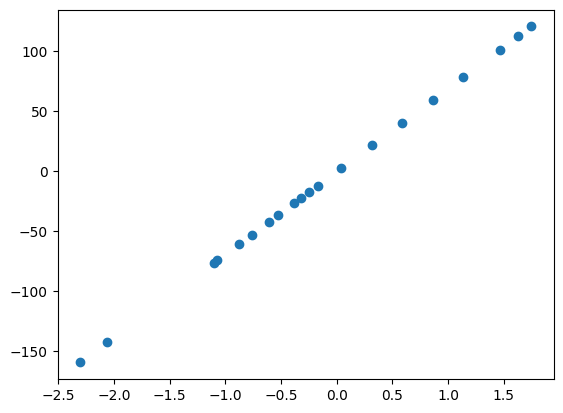

In [5]:
plt.figure() # создает новую фигуру для графика
plt.scatter(x, y) # рисует точечную
plt.show() # отображает график

In [6]:
class Model(object): # Модель парной линейной регрессии
    def __init__(self, max_iter=50):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x): # предсказания модели для входных х
        return self.b0 + self.b1 * x

    def error(self, x, y): # вычисление среднеквадратичной ошибки (MSE) / 2
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y): # обучение модели с использованием градиентного спуска
        alpha = 0.1 # шаг градиентного спуска
        errors = [self.error(x, y)] # ошибки на каждой итерации

        for _ in range(self.max_iter):
          # градиенты функции ошибки
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1

          new_error = self.error(x, y)
          old_error = errors[-1]

          if old_error - new_error < 0.000001: # процесс обучения прекращается досрочно
            break

          errors.append(self.error(x, y))

        else:
          print("Warning!") # достиг макс числа итераций

        return errors

График кривой обучения показывает, как ошибка модели изменяется с каждой итерацией градиентного спуска. (обычно ошибка уменьшается, как модель обучается)

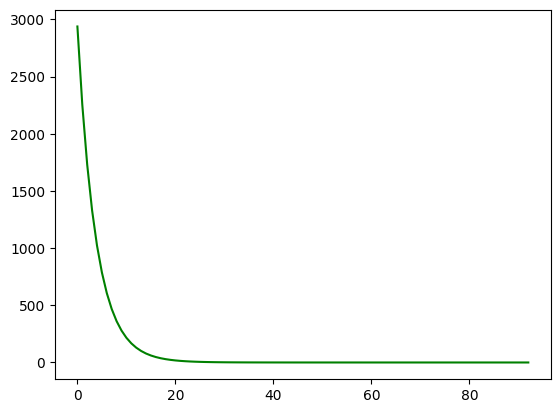

In [7]:
model = Model(max_iter=100)
errors = model.fit(x, y)
plt.plot(errors, 'g')

## Задания для самостоятельного выполнения

*1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.*

На разных начальных значениях параметров проверим, как изменяется ошибка на каждой итерации.


Начальные значения b0=0, b1=0:
Ошибка после обучения: 0.03937321303112907


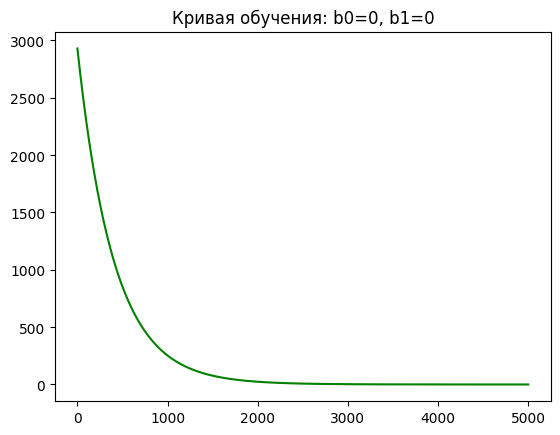


Начальные значения b0=5, b1=-5:
Ошибка после обучения: 0.035460176599721775


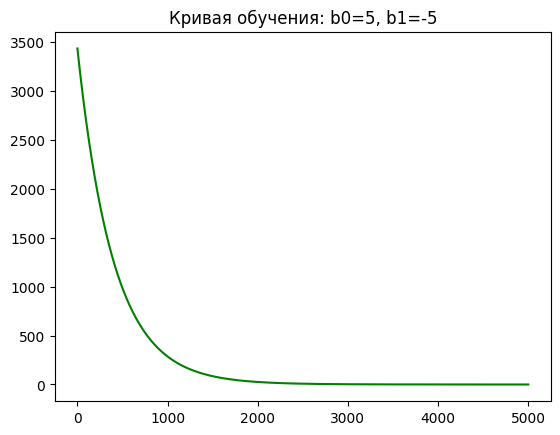


Начальные значения b0=-10, b1=20:
Ошибка после обучения: 0.03725408717628748


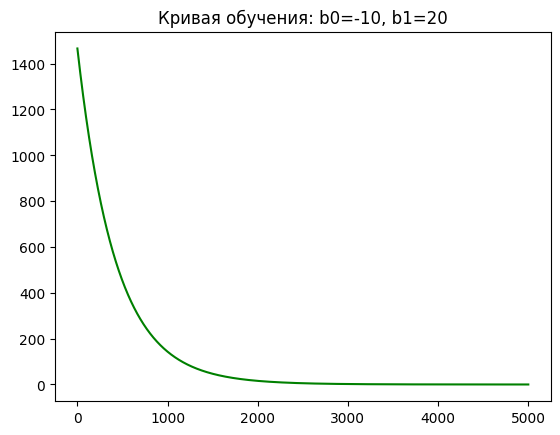


Начальные значения b0=1, b1=1:
Ошибка после обучения: 0.03632269468793788


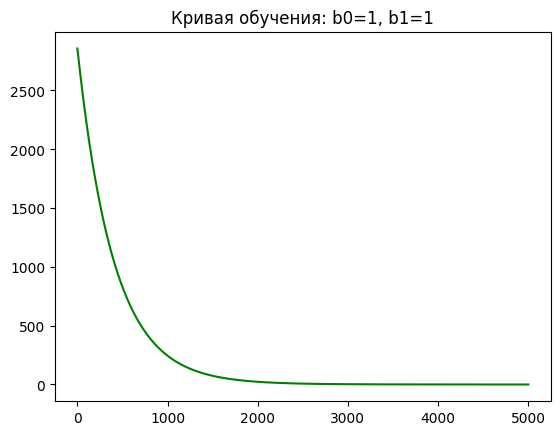

In [8]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err < accuracy:  # ошибка достаточно мала - останавливаем обучение
                break
        return steps, errors


initial_values = [(0, 0), (5, -5), (-10, 20), (1, 1)]
for b0, b1 in initial_values:
    print(f"\nНачальные значения b0={b0}, b1={b1}:")
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    print(f"Ошибка после обучения: {hyp.error(x, y)}")

    # график кривой обучения
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: b0={b0}, b1={b1}")
    plt.show()


*2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.*

Меняя скорость обучения, будем наблюдать за изменением ошибки. Когда скорость обучения велика, алгоритм может пропускать оптимальное значение и не сходиться. Если скорость мала, то модель будет сходиться очень медленно.


Скорость обучения α=0.0001:


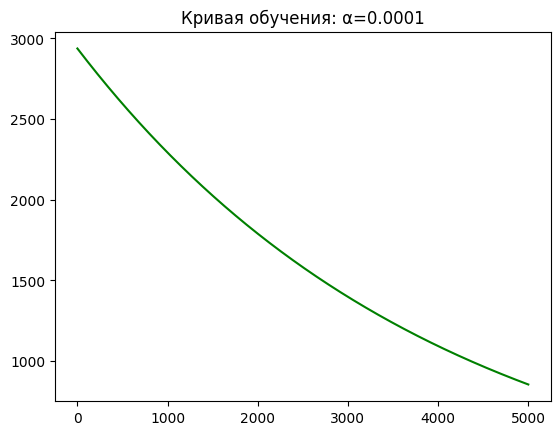

Ошибка после обучения для α=0.0001: 855.0919381472826

Скорость обучения α=0.001:


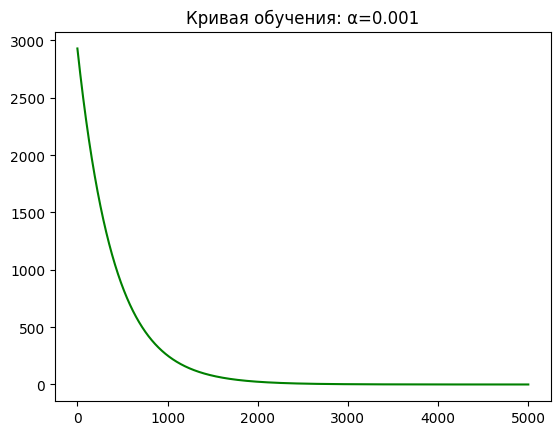

Ошибка после обучения для α=0.001: 0.03937321303112907

Скорость обучения α=0.01:


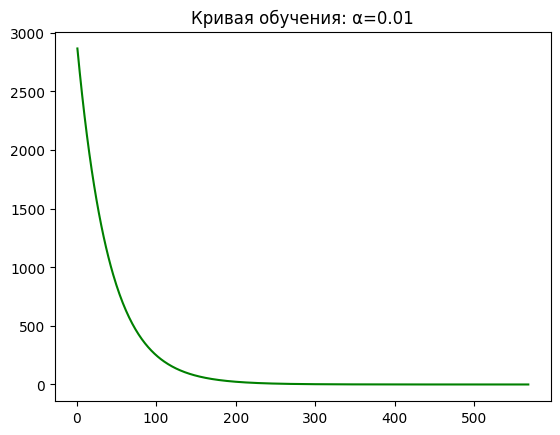

Ошибка после обучения для α=0.01: 0.009808887709615393

Скорость обучения α=0.1:


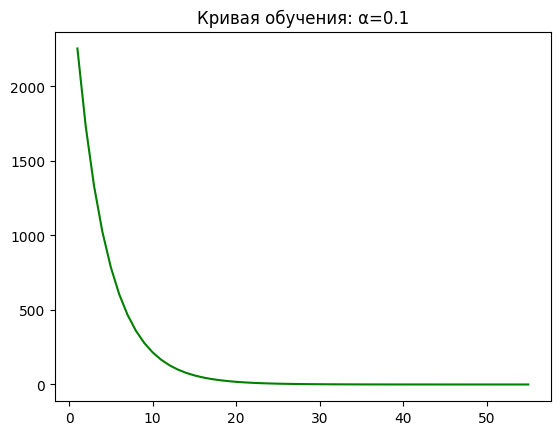

Ошибка после обучения для α=0.1: 0.008384625640821241

Скорость обучения α=1:


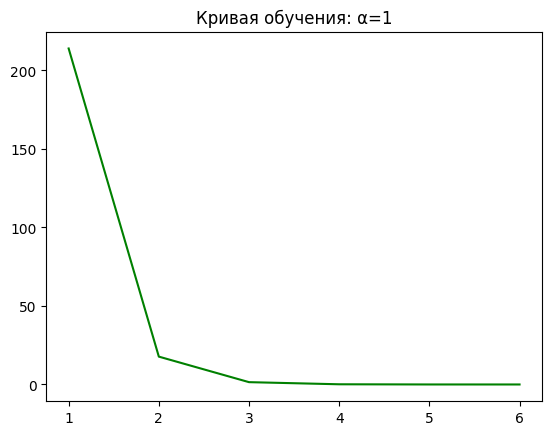

Ошибка после обучения для α=1: 0.0008603627290350645

Скорость обучения α=10:
Ошибка слишком велика, возможно, алгоритм расходится.


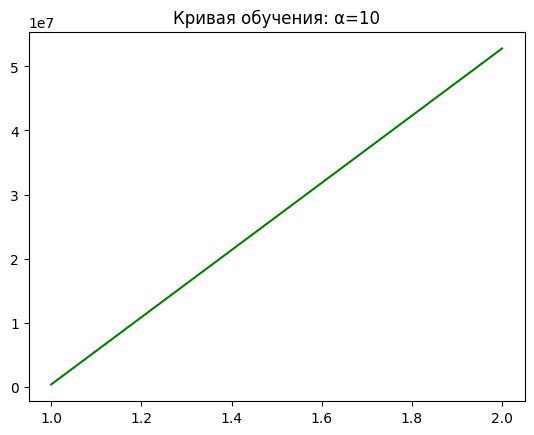

Ошибка после обучения для α=10: 52762785.426702484


In [9]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            # проверка на расходимость
            if new_err > 1e6:  # ошибка слишком большая
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if new_err < accuracy:
                break

        return steps, errors


alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    print(f"\nСкорость обучения α={alpha}:")
    hyp = Model(0, 0)  # b0 и b1 равны 0
    steps, errors = hyp.fit(x, y, alpha=alpha)

    # график кривой обучения
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: α={alpha}")
    plt.show()

    print(f"Ошибка после обучения для α={alpha}: {hyp.error(x, y)}")


*3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.*

In [10]:
x = x.iloc[:, 0] if isinstance(x, pd.DataFrame) else x # берется первый столбец и преобразуется в одномерный объект Series
y = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if new_err < accuracy:
                break

        return steps, errors


*4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.*

In [11]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')  # предыдущее значение ошибки как бесконечность

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if abs(prev_error - new_err) < min_delta: # проверка как понизилась ошибка
                print(f"Ошибка перестала существенно снижаться. Остановка на шаге {step}.")
                break

            prev_error = new_err

        return steps, errors


*5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.*


Скорость обучения α=0.0001:
Алгоритм завершен после 5000 шагов.


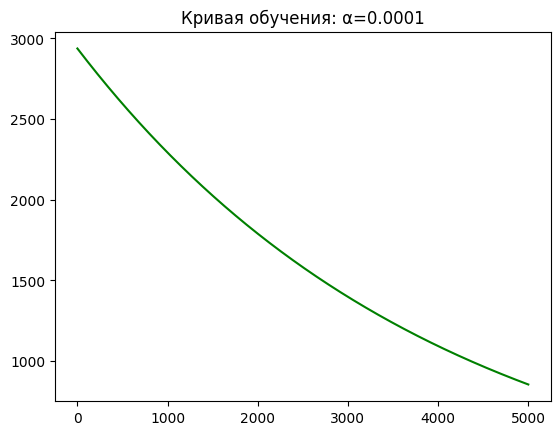

Ошибка после обучения для α=0.0001: 855.0919381472826

Скорость обучения α=0.001:
Алгоритм завершен после 5000 шагов.


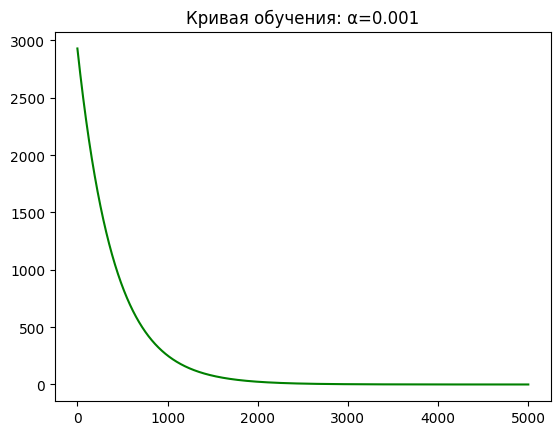

Ошибка после обучения для α=0.001: 0.03937321303112907

Скорость обучения α=0.01:
Ошибка перестала существенно снижаться. Остановка на шаге 841.


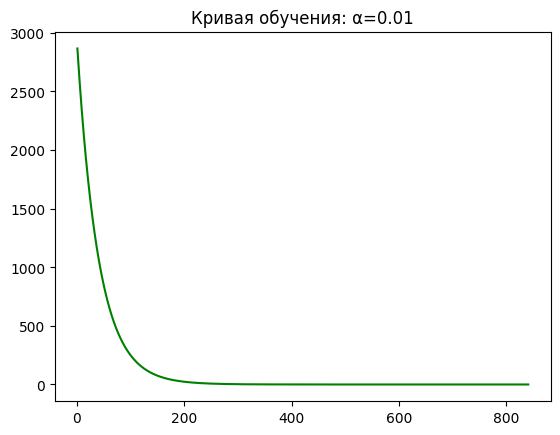

Ошибка после обучения для α=0.01: 5.1965984645194266e-05

Скорость обучения α=0.1:
Ошибка перестала существенно снижаться. Остановка на шаге 93.


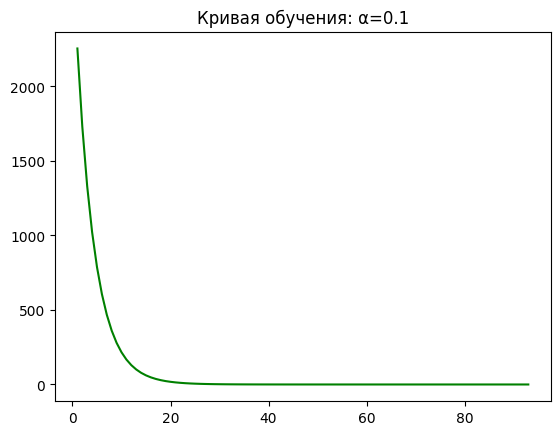

Ошибка после обучения для α=0.1: 4.341656706840177e-06

Скорость обучения α=1:
Ошибка перестала существенно снижаться. Остановка на шаге 10.


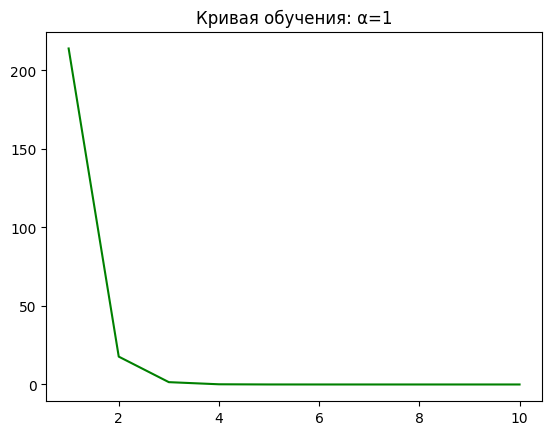

Ошибка после обучения для α=1: 4.1772608368551725e-08

Скорость обучения α=10:
Ошибка слишком велика, возможно, алгоритм расходится.


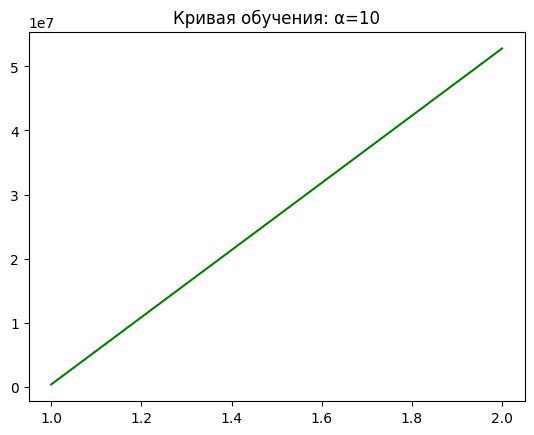

Ошибка после обучения для α=10: 52762785.426702484


In [12]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if abs(prev_error - new_err) < min_delta:
                print(f"Ошибка перестала существенно снижаться. Остановка на шаге {step}.")
                break

            prev_error = new_err

        else:
            print(f"Алгоритм завершен после {max_steps} шагов.")

        return steps, errors

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    print(f"\nСкорость обучения α={alpha}:")
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: α={alpha}")
    plt.show()

    print(f"Ошибка после обучения для α={alpha}: {hyp.error(x, y)}")


*6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.*

Градиенты стали слишком большими! Уменьшаем alpha с 1.0 до 0.5
Ошибка стабилизировалась. Остановка на шаге 15.


<ipython-input-13-9ffdb70bf828>:10: RuntimeWarning: overflow encountered in square
  return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))


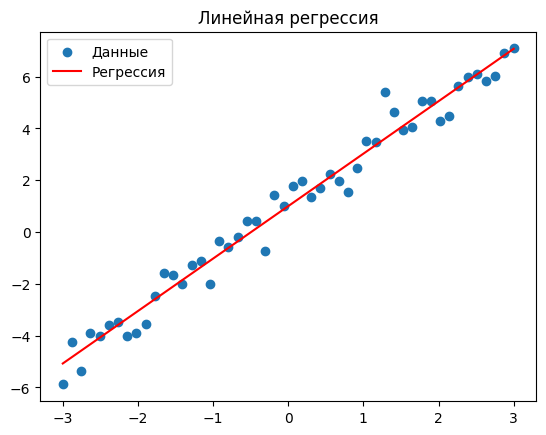

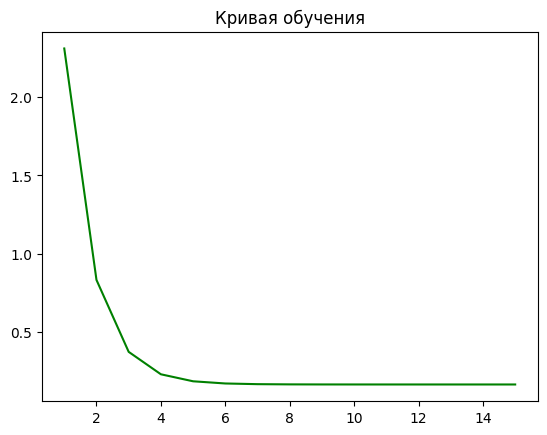

Итоговая ошибка: 0.165717


In [13]:
class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, max_steps=5000, min_delta=1e-6):
        step, prev_error = 0, float('inf')

        while True:  # цикл для перезапуска при снижении alpha
            self.b0, self.b1 = 0, 0
            steps, errors = [], []

            for step in range(1, max_steps + 1):
                dJ0 = np.sum(self.predict(X) - Y) / len(X)
                dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1

                new_err = self.error(X, Y)
                steps.append(step)
                errors.append(new_err)

                if np.isnan(new_err) or np.isinf(new_err):
                    print(f"Градиенты стали слишком большими! Уменьшаем alpha с {alpha} до {alpha / 2}")
                    alpha /= 2
                    break  # перезапускаем цикл

                # если на первом шаге ошибка увеличилась, уменьшаем alpha
                if step == 1 and new_err > prev_error:
                    print(f"Ошибка увеличилась, уменьшаем alpha с {alpha} до {alpha / 2}")
                    alpha /= 2
                    break  # перезапускаем

                # проверка на сходимость
                if abs(prev_error - new_err) < min_delta:
                    print(f"Ошибка стабилизировалась. Остановка на шаге {step}.")
                    return steps, errors

                prev_error = new_err

            else:
                print(f"Достигнуто максимальное число шагов: {max_steps}.")
                return steps, errors


x = np.linspace(-3, 3, 50)
y = 2 * x + 1 + np.random.randn(50) * 0.5
# randn создает 50 случайных чисел из нормального распределения
# шум добавляется чтобы коэффициенты не были идеально линейными

hyp = Model()
steps, errors = hyp.fit(x, y)

# график регрессии
X0 = np.linspace(-3, 3, 100)
plt.scatter(x, y, label="Данные")
plt.plot(X0, hyp.predict(X0), 'r', label="Регрессия")
plt.legend()
plt.title("Линейная регрессия")
plt.show()

# график кривой обучения
plt.plot(steps, errors, 'g')
plt.title("Кривая обучения")
plt.show()

print(f"Итоговая ошибка: {hyp.error(x, y):.6f}")


*7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.*

In [14]:
class Model(object):
    def __init__(self, max_iter=50):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):  # обучение модели с использованием градиентного спуска
        alpha = 0.1  # шаг градиентного спуска
        errors = [self.error(x, y)]  # ошибки на каждой итерации

        for _ in range(self.max_iter):
            # градиенты функции ошибки
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(x, y)
            old_error = errors[-1]

            if old_error - new_error < 0.000001:  # процесс обучения прекращается досрочно
                break

            errors.append(self.error(x, y))

        else:
            print("Warning!")  # достиг макс числа итераций

        return errors

    def plot(self, x, y): # метод для построения графиков
        #график регрессии
        X0 = np.linspace(min(x), max(x), 100)
        Y0 = self.predict(X0)
        plt.figure(figsize=(12, 6))

        # График данных и регрессии
        plt.subplot(1, 2, 1)
        plt.scatter(x, y, color='blue', label='Данные')
        plt.plot(X0, Y0, 'r', label='Предсказание')
        plt.title("Линейная регрессия")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()

        # график кривой обучения
        plt.subplot(1, 2, 2)
        errors = self.fit(x, y)
        plt.plot(errors, color='green', label='Ошибка')
        plt.title("Кривая обучения")
        plt.xlabel("Шаги")
        plt.ylabel("Ошибка")
        plt.legend()

        plt.tight_layout()
        plt.show()


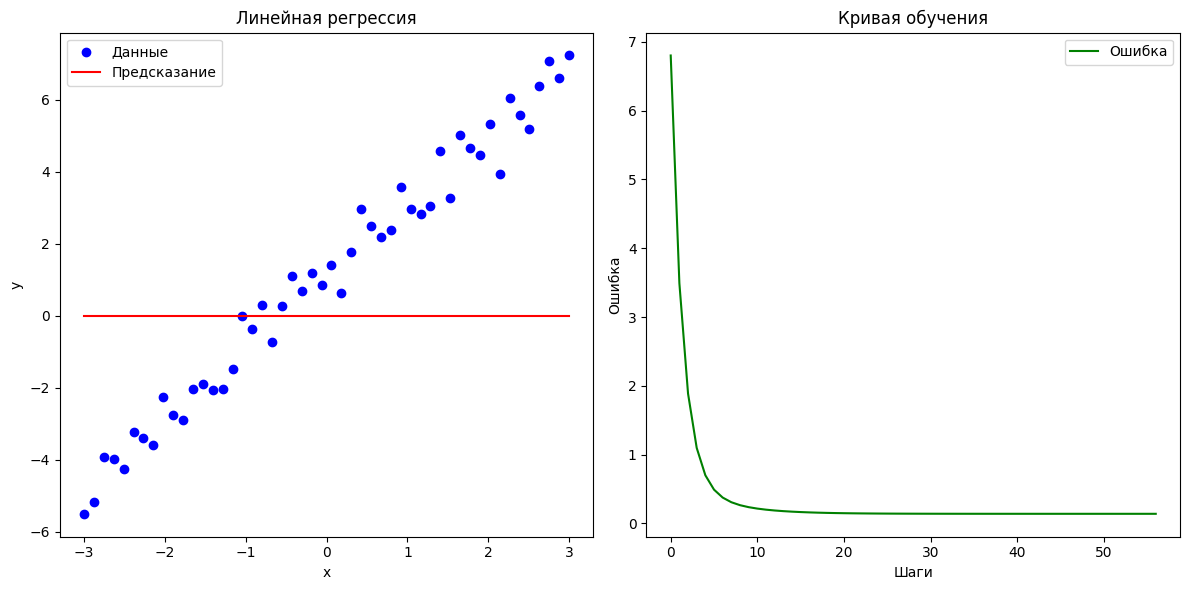

In [15]:
x = np.linspace(-3, 3, 50)
y = 2 * x + 1 + np.random.randn(50) * 0.5

model = Model(max_iter=100)
model.plot(x, y)


# Множественная линейная регрессия на чистых данных

Множественная регрессия - метод статистического анализа для моделирования зависимости одной зависимой переменной от двух или более независимых переменных.

y=b0+b1x1+b2x2+...e (случайная ошибка)

## Из методички

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None) # в датасете нет заголовков

In [18]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [19]:
x.shape, y.shape

((387, 5), (387, 1))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
binary = LinearRegression()

Построим модель парной регрессии от одного из признаков в датасете.

По умолчанию в DataFrame индексация по столбцам. Взятие одного столбца возвращает не DataFrame, а одномерный массив Series. Для того, чтобы был датафрейм из одного столбца можно использовать x[[1]].

In [22]:
binary.fit(x[[1]], y)

LinearRegression()

In [23]:
binary.coef_

array([[95.52010745]])

In [24]:
binary.predict(x[[1]]) # рассчитывает теоретические значения признака

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

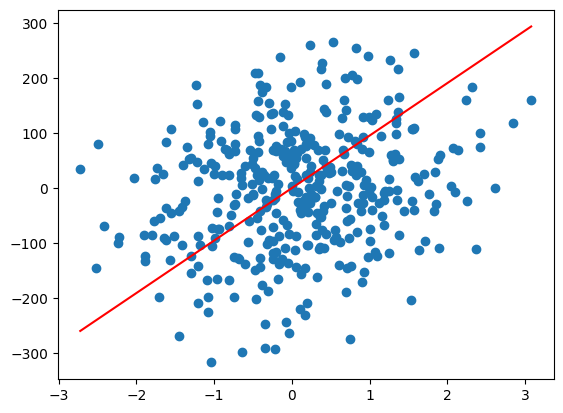

In [25]:
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1)) # равномерное распределение точек от мин до макс
plt.scatter(x[0], y)
plt.plot(xx, binary.predict(xx), c='r')

In [26]:
binary.score(x[[0]], y) # метрика эффективности полученной модели

-0.40944746350605143

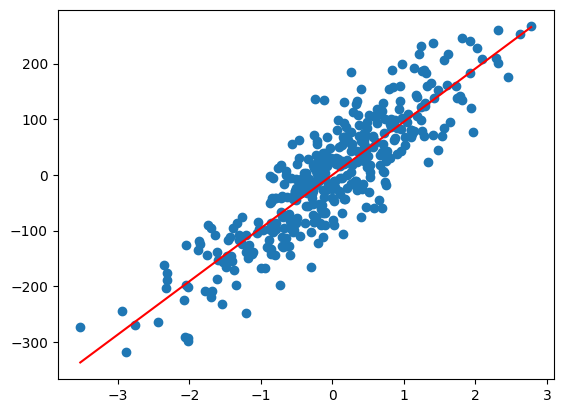

In [27]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.scatter(x[1], y)
plt.plot(xx, binary.predict(xx), c='r')

In [28]:
binary.score(x[[1]], y)

0.7699743283650629

In [29]:
multiple = LinearRegression() # для множественной регрессии те же шаги, но с полным датасетом
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

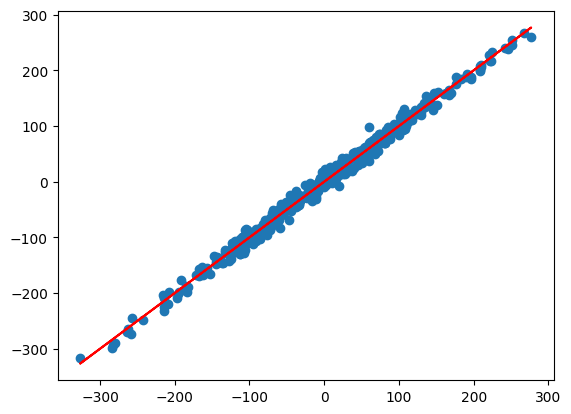

In [30]:
yy = multiple.predict(x) # график зависимости теор значений от эмпирических (как предсказания отличаются от истины)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

## Задания для самостоятельного выполнения

*1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.*

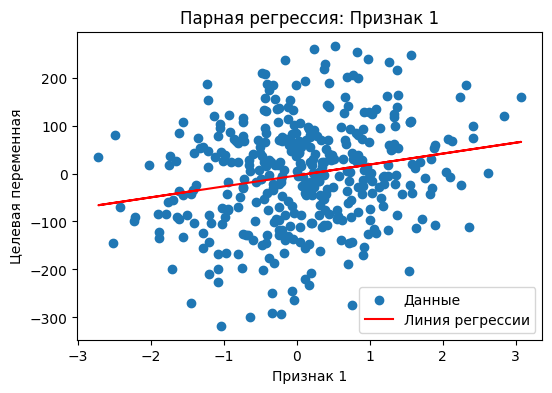

Признак 1 - b0 = -4.05666473187296, b1 = 22.7811134205866


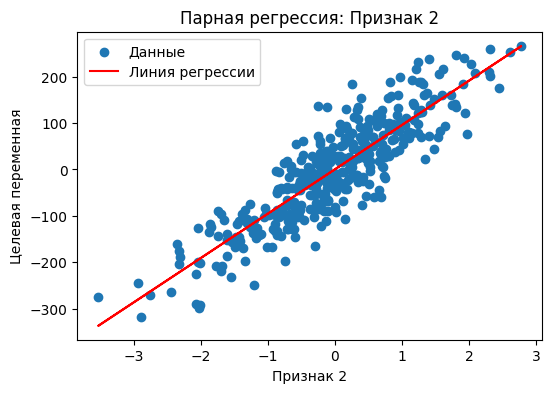

Признак 2 - b0 = 0.003320924502834277, b1 = 95.52010744785575


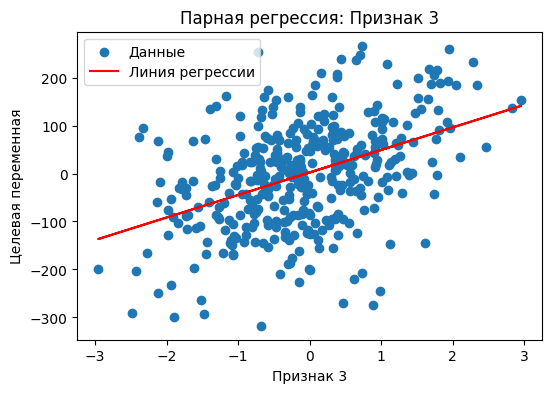

Признак 3 - b0 = 2.1934010808461943, b1 = 46.94897635119021


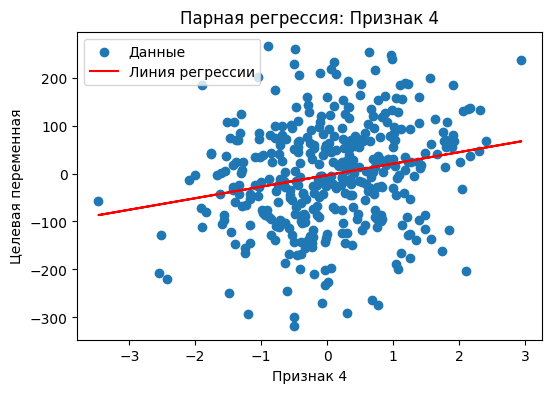

Признак 4 - b0 = -3.488249616549184, b1 = 23.998824072824334


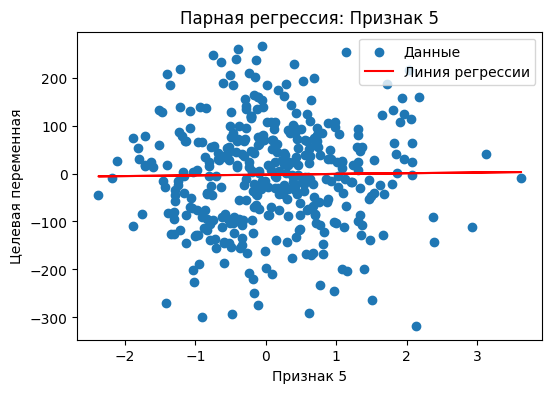

Признак 5 - b0 = -2.329709071771846, b1 = 1.4908204197891677


In [31]:
model = LinearRegression()

# проход по всем столбцам (признакам)
for i in range(x.shape[1]):
    plt.figure(figsize=(6, 4))

    model.fit(x[[i]], y)

    y_pred = model.predict(x[[i]])

    plt.scatter(x[i], y, label='Данные')
    plt.plot(x[i], y_pred, color='red', label='Линия регрессии')

    plt.title(f'Парная регрессия: Признак {i+1}')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

    print(f'Признак {i+1} - b0 = {model.intercept_[0]}, b1 = {model.coef_[0][0]}')


*2. Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.*

Коэффициенты линейной регрессии:  [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]
Свободный член:  [0.56498354]
Коэффициент детерминации R^2: 0.9922198026415868


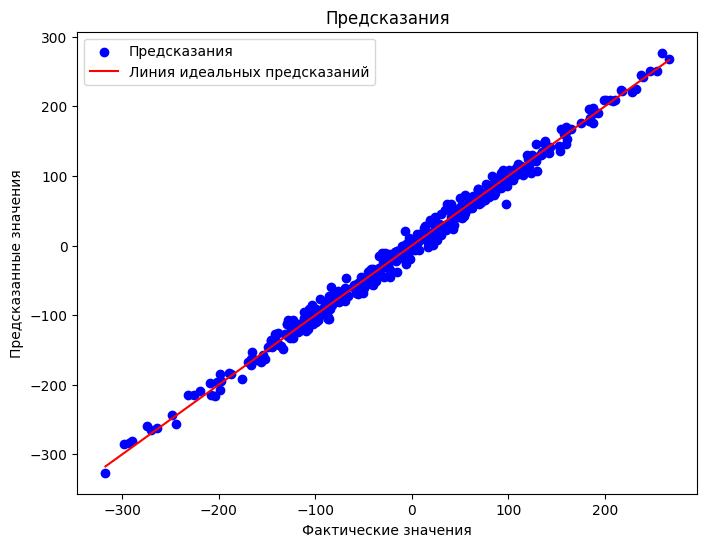

In [32]:
model = LinearRegression()

model.fit(x, y) # обучение на всех данных

print("Коэффициенты линейной регрессии: ", model.coef_)
print("Свободный член: ", model.intercept_)

y_pred = model.predict(x) # предсказания на основе модели

r2_score = model.score(x, y) # коэффициент детерминации
print(f"Коэффициент детерминации R^2: {r2_score}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label="Линия идеальных предсказаний")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказания")
plt.legend()
plt.show()


*3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.*

Полиномиальная регрессия - связь между независимой переменной (признаками) и зависимой переменной моделируется как полином заданной степени.

y=w0+w1x+w2*x^2+w3*x^3+...+e (e - ошибка модели: разница между предсказанными и реальными значениями)

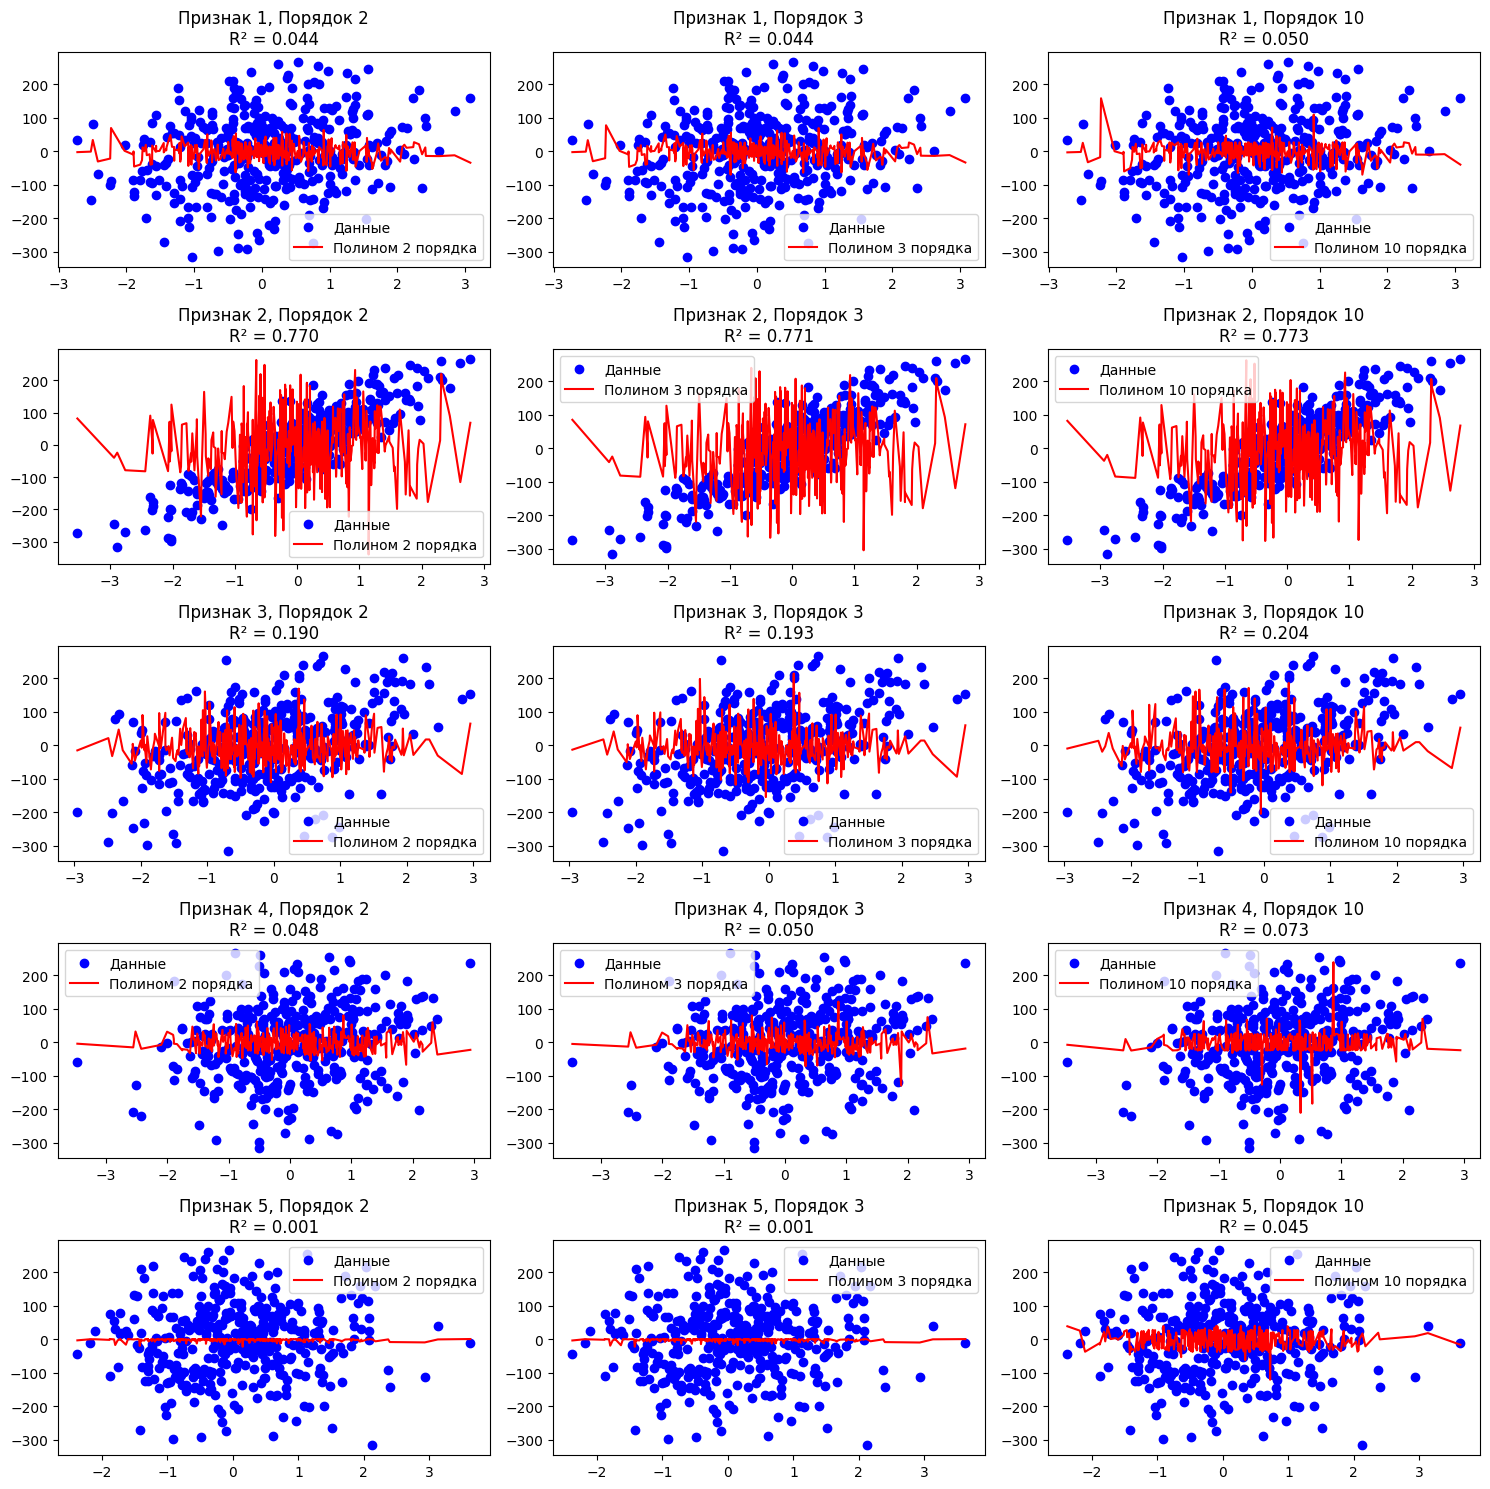

Признак 1:
 Порядок 2: R² = 0.044
 Порядок 3: R² = 0.044
 Порядок 10: R² = 0.050
Признак 2:
 Порядок 2: R² = 0.770
 Порядок 3: R² = 0.771
 Порядок 10: R² = 0.773
Признак 3:
 Порядок 2: R² = 0.190
 Порядок 3: R² = 0.193
 Порядок 10: R² = 0.204
Признак 4:
 Порядок 2: R² = 0.048
 Порядок 3: R² = 0.050
 Порядок 10: R² = 0.073
Признак 5:
 Порядок 2: R² = 0.001
 Порядок 3: R² = 0.001
 Порядок 10: R² = 0.045


In [33]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    r2_score = model.score(x_poly, y) # коэффициент детерминации

    return y_pred, r2_score, model.coef_, model.intercept_

# полиномиальная регрессия для каждого признака
degrees = [2, 3, 10]
fig, axes = plt.subplots(len(x.columns), len(degrees), figsize=(15, 15))

for i in range(len(x.columns)):  # проход по признакам
    for j, degree in enumerate(degrees):  # проход по порядкам полинома
        y_pred, r2, coef, intercept = polynomial_regression(x[[i]], y, degree)

        ax = axes[i, j] # элемент массива axes при построении subplots()
        ax.scatter(x[i], y, color='blue', label='Данные')
        ax.plot(np.sort(x[i].values), np.sort(y_pred), color='red', label=f'Полином {degree} порядка')
        ax.set_title(f'Признак {i+1}, Порядок {degree}\nR² = {r2:.3f}')
        ax.legend()

plt.tight_layout()
plt.show()

for i in range(len(x.columns)):
    print(f"Признак {i+1}:")
    for degree in degrees:
        _, r2, coef, intercept = polynomial_regression(x[[i]], y, degree)

        coef_str = ', '.join([f'{c:.3f}' for c in coef[0, 1:]])  # пропускаем свободный член
        print(f" Порядок {degree}: R² = {r2:.3f}")


Признак 1 слабо влияет на целевую переменную (низкое значение R^2).

Признак 2 значительно влияет. Полином 10 чуть лучше, но разница минимальна.

Признак 3 - слабое влияние. Увеличение степени полинома дает увеличение точности.

Признак 4 почти не влияет.

Признак 5 слабо связан с целевой переменной. Улучшение на полиноме 10, возможно, нелинейная зависимость.

*4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.*

In [34]:
def plot_polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    r2_score = model.score(x_poly, y)

    return r2_score, model.coef_, model.intercept_

results = []

# для каждого признака и степени полинома вычисляем R²
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        r2, coef, intercept = plot_polynomial_regression(x[[i]], y, degree)
        results.append({
            'Признак': i + 1,
            'Порядок полинома': degree,
            'R²': r2
        })

results_df = pd.DataFrame(results) # DataFrame для сводной таблицы

print(results_df)


    Признак  Порядок полинома        R²
0         1                 2  0.043672
1         1                 3  0.043765
2         1                10  0.050356
3         2                 2  0.769994
4         2                 3  0.771118
5         2                10  0.772677
6         3                 2  0.190008
7         3                 3  0.192802
8         3                10  0.204409
9         4                 2  0.047943
10        4                 3  0.050312
11        4                10  0.072667
12        5                 2  0.001049
13        5                 3  0.001065
14        5                10  0.045053


Признак 1, 4 - недообучение (R^2 остается низким).

Признак 2, 3 - хорошие показатели.

Признак 5 - переобучение (скачок при 10).

*5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.*

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def compute_metrics(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    # коэффициент детерминации
    r2_score = model.score(x_poly, y)

    # метрики
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # средняя абсолютная процентная ошибка (MAPE)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    return r2_score, mae, mse, rmse, mape, model.coef_, model.intercept_

results = []

for i in range(x.shape[1]):  # для каждого признака
    for degree in [2, 3, 10]:  # для каждого порядка полинома
        r2, mae, mse, rmse, mape, coef, intercept = compute_metrics(x[[i]], y, degree)
        results.append({
            'Признак': i + 1,
            'Порядок полинома': degree,
            'R²': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape
        })

results_df = pd.DataFrame(results)

print(results_df)


    Признак  Порядок полинома        R²        MAE           MSE        RMSE  \
0         1                 2  0.043672  85.778988  11491.909255  107.200323   
1         1                 3  0.043765  85.684404  11490.787323  107.195090   
2         1                10  0.050356  84.854224  11411.586520  106.825028   
3         2                 2  0.769994  42.132303   2763.909753   52.572899   
4         2                 3  0.771118  42.061248   2750.401156   52.444267   
5         2                10  0.772677  41.690871   2731.672893   52.265408   
6         3                 2  0.190008  77.458415   9733.431563   98.658155   
7         3                 3  0.192802  77.570200   9699.859735   98.487866   
8         3                10  0.204409  76.815422   9560.372197   97.777156   
9         4                 2  0.047943  83.446884  11440.588266  106.960686   
10        4                 3  0.050312  83.444329  11412.119234  106.827521   
11        4                10  0.072667 

*6. Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.*

   Порядок полинома  Время обучения (сек.)
0                 2               0.002070
1                 3               0.004212
2                10               0.173261


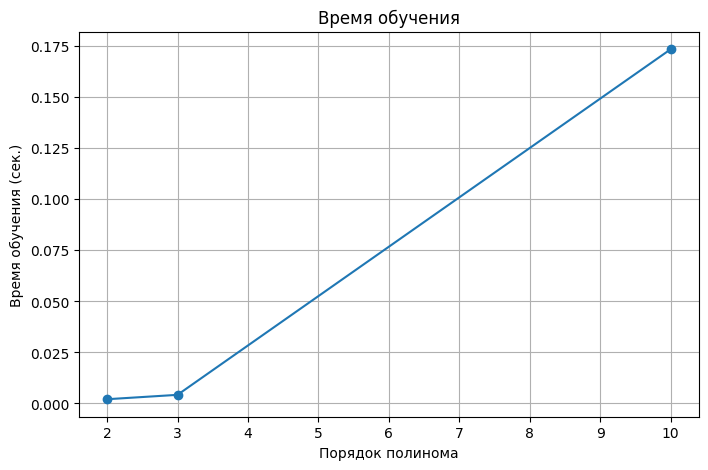

In [36]:
import time


def measure_training_time(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()

    # засекаем время обучения
    start_time = time.time()
    model.fit(x_poly, y)
    end_time = time.time()

    training_time = end_time - start_time
    return training_time

training_times = []

for degree in [2, 3, 10]:
    training_time = measure_training_time(x, y, degree)
    training_times.append({
        'Порядок полинома': degree,
        'Время обучения (сек.)': training_time
    })

training_times_df = pd.DataFrame(training_times)

print(training_times_df)

# график время обучения
plt.figure(figsize=(8, 5))
plt.plot(training_times_df['Порядок полинома'], training_times_df['Время обучения (сек.)'], marker='o')
plt.title('Время обучения')
plt.xlabel('Порядок полинома')
plt.ylabel('Время обучения (сек.)')
plt.grid(True)
plt.show()


С увеличением степени полинома время обучения возрастает. Это связано с тем, что увеличивается кол-во параметров модели и сложности вычислений.